In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [50]:
# import the dataset
df=pd.read_csv('Travel.csv')
df

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0


In [51]:
# drop the cols customer_id, typeofcontact
df.drop(['CustomerID','TypeofContact'],axis=1,inplace=True) #inplace means to do task permanently


In [52]:
# basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ProdTaken                 4888 non-null   int64  
 1   Age                       4662 non-null   float64
 2   CityTier                  4888 non-null   int64  
 3   DurationOfPitch           4637 non-null   float64
 4   Occupation                4888 non-null   object 
 5   Gender                    4888 non-null   object 
 6   NumberOfPersonVisiting    4888 non-null   int64  
 7   NumberOfFollowups         4843 non-null   float64
 8   ProductPitched            4888 non-null   object 
 9   PreferredPropertyStar     4862 non-null   float64
 10  MaritalStatus             4888 non-null   object 
 11  NumberOfTrips             4748 non-null   float64
 12  Passport                  4888 non-null   int64  
 13  PitchSatisfactionScore    4888 non-null   int64  
 14  OwnCar  

In [53]:
df.isnull().sum().sort_values(ascending=True)

ProdTaken                     0
OwnCar                        0
PitchSatisfactionScore        0
Passport                      0
MaritalStatus                 0
Designation                   0
ProductPitched                0
Gender                        0
Occupation                    0
CityTier                      0
NumberOfPersonVisiting        0
PreferredPropertyStar        26
NumberOfFollowups            45
NumberOfChildrenVisiting     66
NumberOfTrips               140
Age                         226
MonthlyIncome               233
DurationOfPitch             251
dtype: int64

In [54]:
# drop all the null values from the dataset
df.dropna(inplace=True)

In [55]:
# treat the missing values col by col
df['MonthlyIncome'].describe()

count     4128.000000
mean     23178.464147
std       4506.614622
min       1000.000000
25%      20751.000000
50%      22418.000000
75%      25301.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [56]:
q10, q25, q50, q75= df['MonthlyIncome'].quantile([0.10, 0.25, 0.50, 0.75]).values

In [57]:
q25, q50, q75

(20751.0, 22418.0, 25301.0)

In [58]:
# interquartile range
Iqr=q75-q25

In [59]:
# define outliers in a col
lf=q25-1.5*Iqr
uf=q75+1.5*Iqr

In [60]:
df['CityTier'].value_counts()

CityTier
1    2678
3    1288
2     162
Name: count, dtype: int64

In [61]:
df['MonthlyIncome'][uf<df['MonthlyIncome']]

25      34094.0
29      33947.0
45      34545.0
62      33740.0
105     33844.0
         ...   
4751    32177.0
4752    32436.0
4828    32255.0
4859    35558.0
4876    32704.0
Name: MonthlyIncome, Length: 221, dtype: float64

In [62]:
df['MonthlyIncome'].fillna(df['MonthlyIncome'].median(),inplace=True)

In [63]:
df['NumberOfChildrenVisiting'].mode()[0]

1.0

In [64]:
df['NumberOfChildrenVisiting'].fillna(df['NumberOfChildrenVisiting'].mode()[0],inplace=True)

In [65]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [66]:
df['DurationOfPitch'].fillna(df['DurationOfPitch'].median(),inplace=True)

In [67]:
df['NumberOfTrips'].fillna(df['NumberOfTrips'].median(),inplace=True)

In [68]:
df['PreferredPropertyStar'].fillna(df['PreferredPropertyStar'].mode()[0],inplace=True)

In [69]:
df['PreferredPropertyStar'].mode()[0]

3.0

In [70]:
df['NumberOfFollowups'].value_counts()

NumberOfFollowups
4.0    1811
3.0    1157
5.0     686
2.0     206
1.0     144
6.0     124
Name: count, dtype: int64

In [71]:
df['NumberOfFollowups'].fillna(df['NumberOfFollowups'].mode()[0],inplace=True)

In [72]:
df['NumberOfFollowups'].median()

4.0

In [73]:
# see duplicates in your data
df.duplicated().sum()
df.shape

(4128, 18)

In [74]:
# drop duplicates from df
df.drop_duplicates(inplace=True)
df.shape

(4011, 18)

In [75]:
# dtypes check
df.dtypes

ProdTaken                     int64
Age                         float64
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [76]:
df.head()

,ProdTaken,Age,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
5,0,32.0,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0


In [77]:
# fix the typo error in gender col from fe male to Female

df['Gender']=df['Gender'].replace('Fe Male','Female')

In [78]:
import seaborn as sns

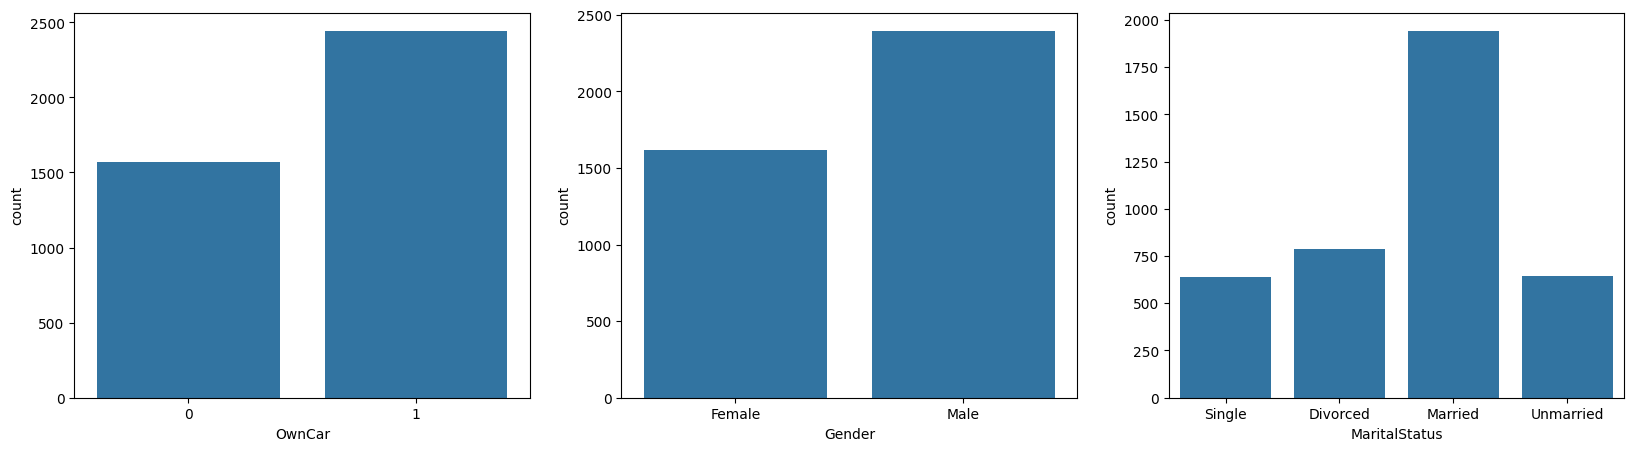

<Figure size 640x480 with 0 Axes>

In [79]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.countplot(x='OwnCar', data=df)

plt.subplot(1,3,2)
sns.countplot(x='Gender', data=df)

plt.subplot(1,3,3)
sns.countplot(x='MaritalStatus', data=df)

plt.show()

# save my countplot figure
plt.savefig('countplot.png')

<Axes: xlabel='NumberOfFollowups', ylabel='MonthlyIncome'>

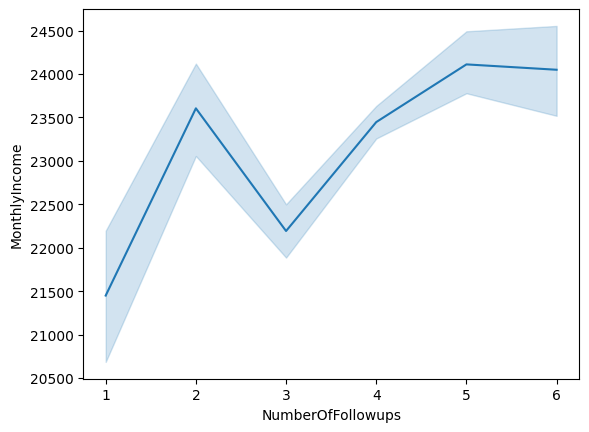

In [80]:
sns.lineplot(x='NumberOfFollowups',y='MonthlyIncome',data=df)

<Axes: xlabel='Age', ylabel='MonthlyIncome'>

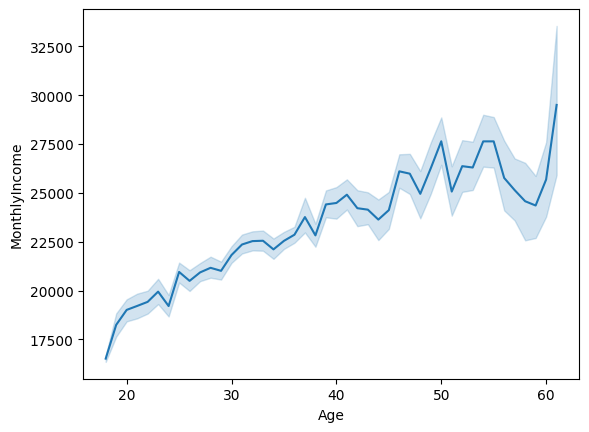

In [81]:
sns.lineplot(x='Age',y='MonthlyIncome',data=df)

In [82]:
x= np.random.normal(size=100)
y= np.random.normal(size=100)

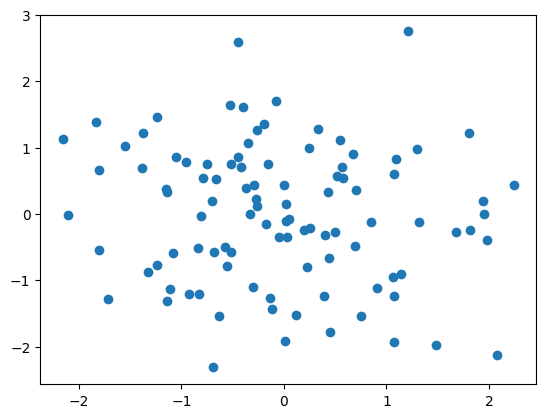

In [83]:
plt.scatter(x,y)

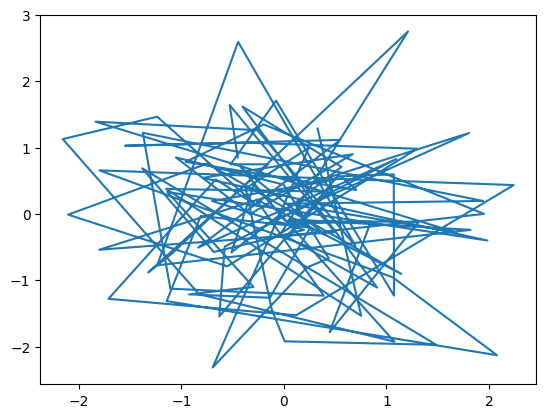

In [84]:
plt.plot(x,y)

<BarContainer object of 4011 artists>

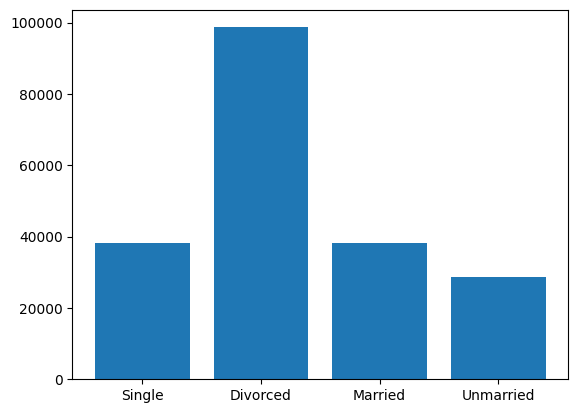

In [85]:
plt.bar(df['MaritalStatus'],df['MonthlyIncome'])

In [86]:
mean_ms=df['MonthlyIncome'].groupby(df['MaritalStatus']).mean()
mean_ms

MaritalStatus
Divorced     23544.807351
Married      23320.453890
Single       21570.858934
Unmarried    23790.399689
Name: MonthlyIncome, dtype: float64

<BarContainer object of 4 artists>

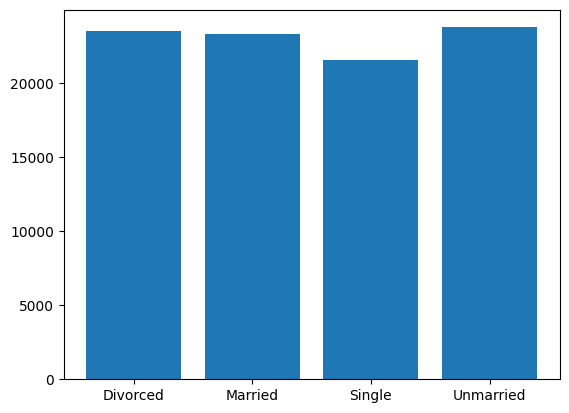

In [87]:
plt.bar(mean_ms.index, mean_ms.values)

<Axes: xlabel='MaritalStatus', ylabel='MonthlyIncome'>

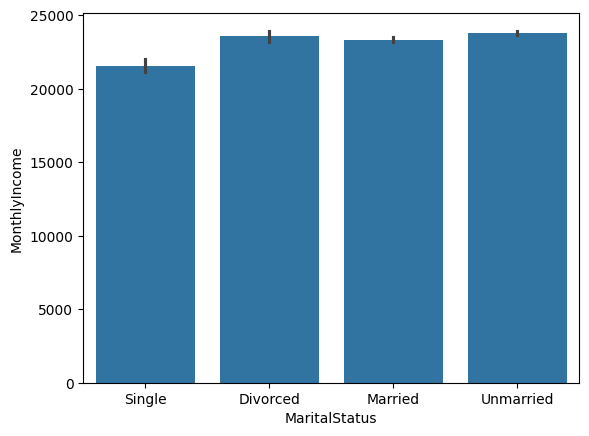

In [88]:
sns.barplot(x='MaritalStatus',y='MonthlyIncome',data=df)

<Axes: xlabel='MaritalStatus', ylabel='MonthlyIncome'>

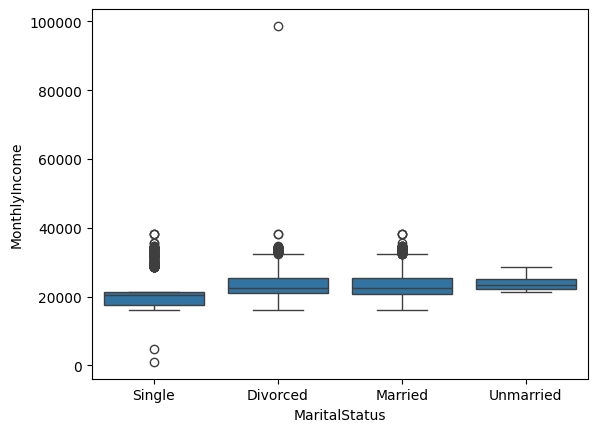

In [89]:
sns.boxplot(x='MaritalStatus',y='MonthlyIncome',data=df)

<Axes: xlabel='NumberOfFollowups', ylabel='MonthlyIncome'>

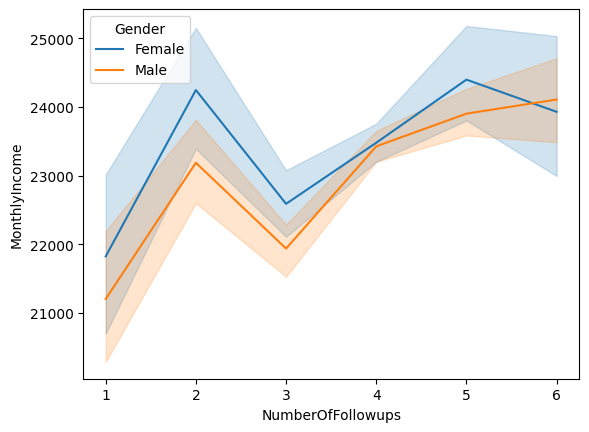

In [90]:
sns.lineplot(x='NumberOfFollowups',y='MonthlyIncome', hue='Gender', data=df)

In [91]:
df1=df.drop('MonthlyIncome', axis=1)

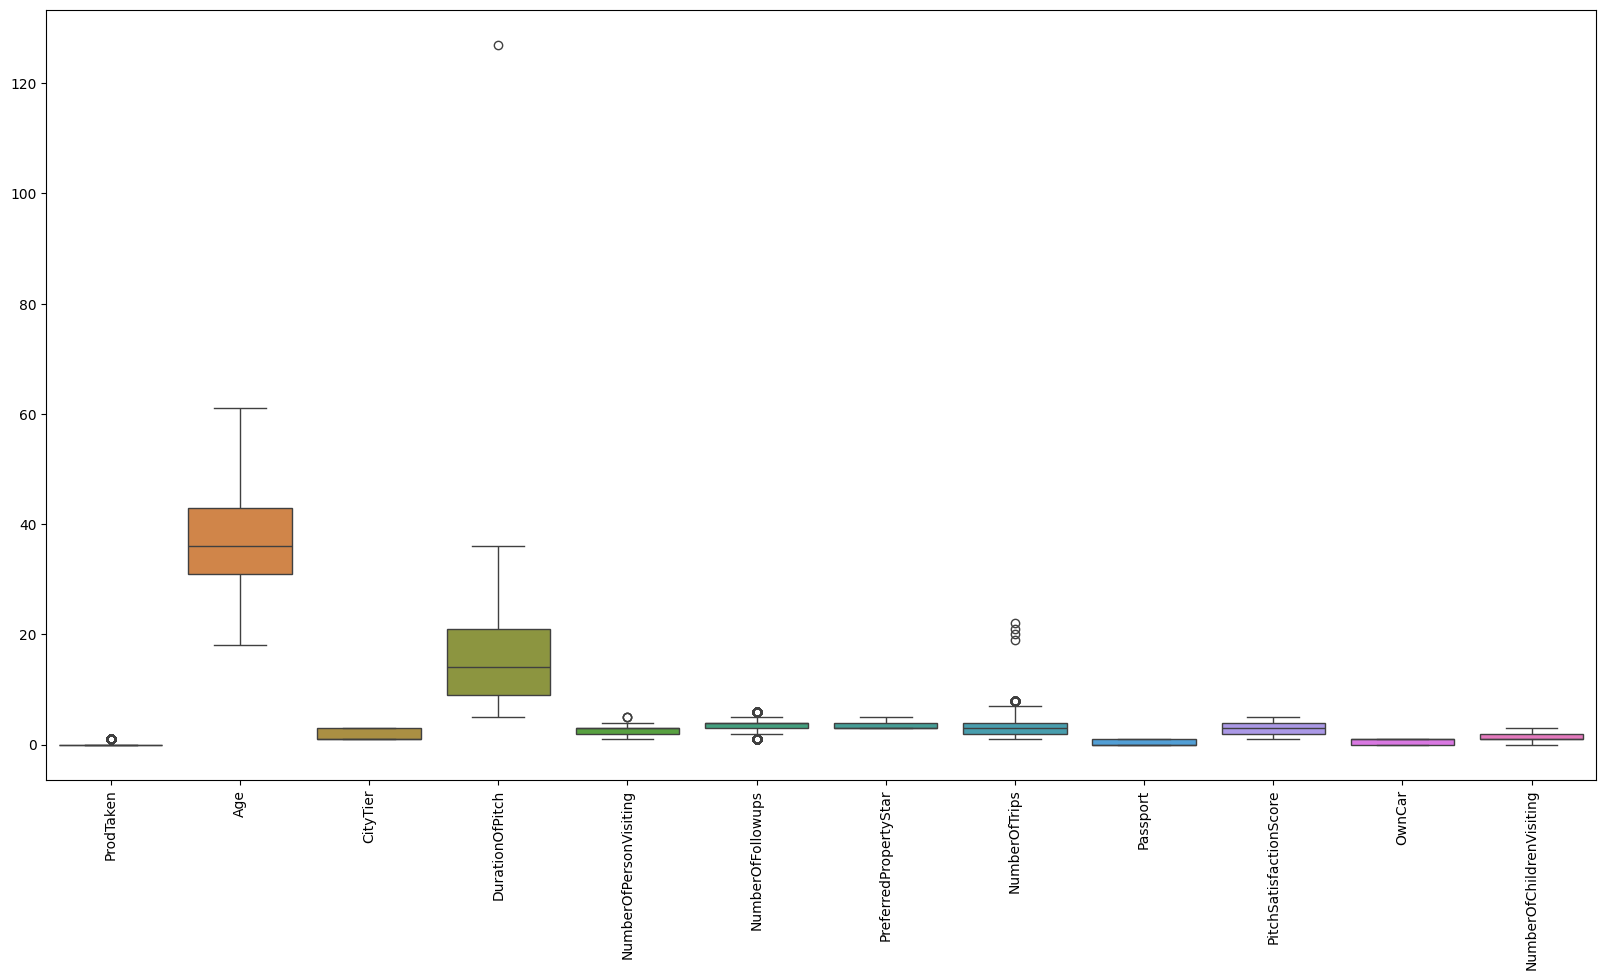

In [92]:
# create boxplot for all numerical variables in df
plt.figure(figsize=(20,10))
sns.boxplot(data=df1)
plt.xticks(rotation=90)
plt.show()


In [93]:
# extract new dataset from seaborn
df=sns.load_dataset('mpg')
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [94]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [95]:
df['horsepower'].fillna(df['horsepower'].median(),inplace=True)

In [96]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [97]:
df['name'].value_counts()

name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [98]:
df.drop('name',axis=1,inplace=True)

In [99]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,usa
1,15.0,8,350.0,165.0,3693,11.5,70,usa
2,18.0,8,318.0,150.0,3436,11.0,70,usa
3,16.0,8,304.0,150.0,3433,12.0,70,usa
4,17.0,8,302.0,140.0,3449,10.5,70,usa
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa
394,44.0,4,97.0,52.0,2130,24.6,82,europe
395,32.0,4,135.0,84.0,2295,11.6,82,usa
396,28.0,4,120.0,79.0,2625,18.6,82,usa


In [100]:
df['origin'].value_counts()

origin
usa       249
japan      79
europe     70
Name: count, dtype: int64

In [101]:
df1=pd.get_dummies(df, columns=['origin'])
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625,18.6,82,False,False,True


In [102]:
df1[['origin_europe',	'origin_japan',	'origin_usa']]=df1[['origin_europe',	'origin_japan',	'origin_usa']].astype(int)

In [103]:
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_europe,origin_japan,origin_usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [104]:
df1_num=df1.drop(['origin_europe',	'origin_japan',	'origin_usa', 'cylinders'], axis=1)
df1_num

,mpg,displacement,horsepower,weight,acceleration,model_year
0,18.0,307.0,130.0,3504,12.0,70
1,15.0,350.0,165.0,3693,11.5,70
2,18.0,318.0,150.0,3436,11.0,70
3,16.0,304.0,150.0,3433,12.0,70
4,17.0,302.0,140.0,3449,10.5,70
...,...,...,...,...,...,...
393,27.0,140.0,86.0,2790,15.6,82
394,44.0,97.0,52.0,2130,24.6,82
395,32.0,135.0,84.0,2295,11.6,82
396,28.0,120.0,79.0,2625,18.6,82


<Axes: >

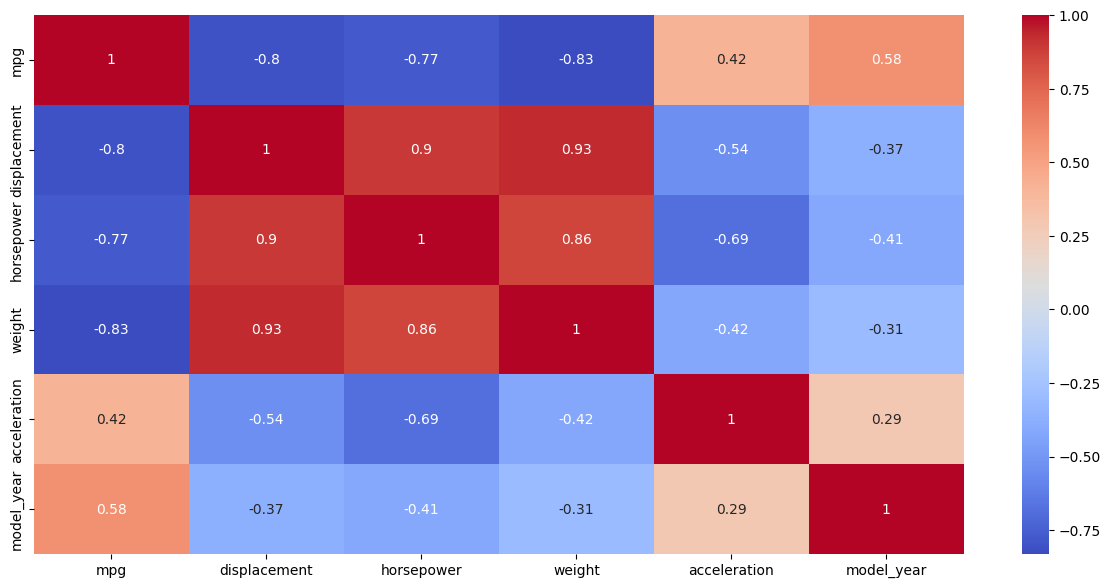

In [105]:
plt.figure(figsize=(15,7))
sns.heatmap(df1_num.corr(), annot=True, cmap='coolwarm')

In [119]:
X=df1_num.drop('mpg',axis=1)
y=df1_num['mpg']

In [122]:
X.drop('weight', axis=1, inplace=True)

In [124]:
X.drop('model_year', axis=1, inplace=True)

In [126]:
X.drop('horsepower', axis=1, inplace=True)

In [127]:
# SEE MULTICOLIINEARITY USING vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()


vif['Features']=X.columns

vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

vif



,Features,VIF
0,displacement,3.085497
1,acceleration,3.085497


In [107]:
# label Encoding

df=pd.DataFrame({'origin':['US','EU','JP', 'JP', 'US', 'US', 'JP']})

In [108]:
df['origin'].value_counts()

origin
US    3
JP    3
EU    1
Name: count, dtype: int64

In [109]:
# Label Encoding
df['origin']=df['origin'].map({'US':2,'EU':0,'JP':1})
df

,origin
0,2
1,0
2,1
3,1
4,2
5,2
6,1


In [110]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

arr1=le.fit_transform(df['origin'])

df_label=pd.DataFrame(arr1, columns=['origin'])


df_final=pd.concat([df,df_label],axis=1)
df_final

,origin,origin
0,2,2
1,0,0
2,1,1
3,1,1
4,2,2
5,2,2
6,1,1


In [111]:
# OHE
df_1=pd.get_dummies(df, columns=['origin'], drop_first=True, dtype='int')
df_1

,origin_1,origin_2
0,0,1
1,0,0
2,1,0
3,1,0
4,0,1
5,0,1
6,1,0


In [112]:
# ohe
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()

arr=ohe.fit_transform(df[['origin']]).toarray()
df_ohe=pd.DataFrame(arr, columns=ohe.get_feature_names_out())
df_ohe

,origin_0,origin_1,origin_2
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0
5,0.0,0.0,1.0
6,0.0,1.0,0.0


In [113]:
df_2=pd.DataFrame({'Student_id':[i for i in range(100,111)],
                   'Grades':['A', 'A', 'B', 'B','C','C','C','C','C','B','B' ]})
df_2

,Student_id,Grades
0,100,A
1,101,A
2,102,B
3,103,B
4,104,C
5,105,C
6,106,C
7,107,C
8,108,C
9,109,B


In [114]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder(categories=[['C', 'B', 'A']])
arr2=oe.fit_transform(df_2[['Grades']])
df_oe=pd.DataFrame(arr2, columns=['Grades'])
df_final=pd.concat([df_2,df_oe],axis=1)
df_final

,Student_id,Grades,Grades
0,100,A,2.0
1,101,A,2.0
2,102,B,1.0
3,103,B,1.0
4,104,C,0.0
5,105,C,0.0
6,106,C,0.0
7,107,C,0.0
8,108,C,0.0
9,109,B,1.0


In [115]:
df_2['grades']=df_2['Grades'].map({'A':2,'B':1,'C':0})
df_2

,Student_id,Grades,grades
0,100,A,2
1,101,A,2
2,102,B,1
3,103,B,1
4,104,C,0
5,105,C,0
6,106,C,0
7,107,C,0
8,108,C,0
9,109,B,1


In [116]:
# target guided Encoding

Df_new=pd.DataFrame ({"Cities":['Brampton', 'Brampton',
                              "Mississauga",  "Mississauga",
                              "Milton","Milton","Milton",'Brampton','Brampton',
                              'Brampton'],"Price":[i for i in range(250,350,10 )]})
Df_new

,Cities,Price
0,Brampton,250
1,Brampton,260
2,Mississauga,270
3,Mississauga,280
4,Milton,290
5,Milton,300
6,Milton,310
7,Brampton,320
8,Brampton,330
9,Brampton,340


In [117]:
labels=Df_new.groupby('Cities')['Price'].mean()

In [118]:
Df_new['Cities']=Df_new['Cities'].map(labels)
Df_new

,Cities,Price
0,300.0,250
1,300.0,260
2,275.0,270
3,275.0,280
4,300.0,290
5,300.0,300
6,300.0,310
7,300.0,320
8,300.0,330
9,300.0,340
